In [1]:
%%capture
!pip install -q transformers datasets rouge-score
# !pip install gensim
# !pip install nmslib
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install
!pip install sentence_transformers
!pip install annoy
!pip install nltk
!pip install contractions
#install spacy large language model. (Colab needs to be restarted/)
!python -m spacy download en_core_web_lg


In [2]:
# import tensorflow_datasets as tfds 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re 
import spacy
from tqdm.notebook import tqdm
  
import tensorflow_hub as hub
from tensorflow import keras 
import tensorflow as tf
from IPython.display import Image 
import matplotlib.pyplot as plt


nlp = spacy.load('en_core_web_lg')

In [5]:
data = pd.read_csv("db_comments_title.csv",usecols=["title","clean_comment"])
# data.drop_duplicates(subset="case_title_x", inplace=True)
data = data.rename(columns={"title":"case_title","clean_comment":"case_description"})
data["art_sents"] = data.case_description.apply(lambda x: len([x for x in nlp(x).sents])) 
data.drop_duplicates(inplace=True)
data

case_description  \
0    HiPaul,Greetings from Databricks!I am reviewin...   
1    Hi team,I hope you are doing well!Thanks for r...   
2    Hi team,I hope you are doing well!Thanks for r...   
3    Hello Sruti,Please let us know CX availability...   
4    Hi,Thank you for reaching out to Databricks Su...   
..                                                 ...   
295  Hi John,Greetings from Databricks!Thanks for r...   
296  Hi Olli,Thanks for reaching out to Databricks,...   
297  Hi Aya,I hope you are doing well!Thanks for re...   
298  Hi Greg,Thanks for reaching out to Databricks....   
299  Hi team,I hope you are doing well!Thanks for r...   

                                            case_title  art_sents  
0    Databricks: S3 request failed with com.amazona...         19  
1         Databricks: GC failure in the latest upgrade         16  
2                     Databricks: ABFS Storage Problem         11  
3      Sruti, let us know CX availability for the call          6  
4               Databricks Support: PenaRA@corning.com         10  
..                                                 ...        ...  
295                                Help@databricks.com         15  
296            Databricks Help: Delta Lake with Python         62  
297                 Asynchronous Error with Databricks         12  
298                       A Databricks Support Problem         41  
299            Databricks: Error: Job no longer exists          4  

[297 rows x 3 columns]

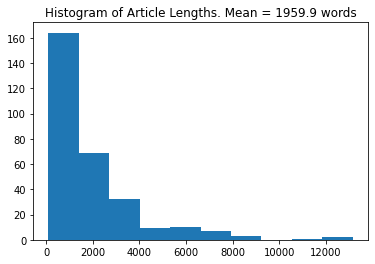

In [7]:
art_lengths = [ len(x) for x in data.case_description] 
plt.hist(art_lengths);
plt.title("Histogram of Article Lengths. Mean = " + str(round(sum(art_lengths)/ len(art_lengths),1)) + " words" );

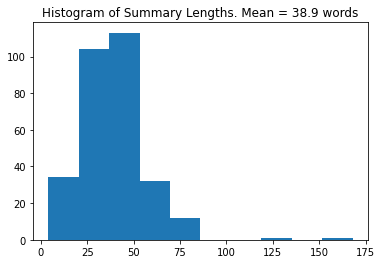

In [8]:
sum_lengths = [ len(x) for x in data.case_title] 
plt.hist(sum_lengths);
plt.title("Histogram of Summary Lengths. Mean = " + str(round(sum(sum_lengths)/ len(sum_lengths),1)) + " words" );

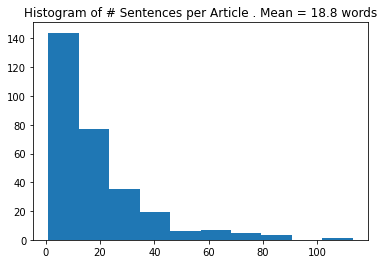

In [9]:
# art_lengths = [ len(x) for x in cnn_df.article] 
plt.hist(data.art_sents);
plt.title("Histogram of # Sentences per Article . Mean = " + str(round(sum(data.art_sents)/ len(data.art_sents),1)) + " words" );

In [10]:
import nltk
# import nltk
# # nltk.download('omw-1.4')
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.corpus import wordnet

nltk.download('omw-1.4')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
stops = stopwords.words('english')
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings('ignore')

stopwords_eng = stopwords.words('english')

# add datbricks stop words
# stopwords_eng +=["to","the","is","in","and","for","a","databricks","this","not","i","with","it","we","of","on","https","are","have","that","but","please","from","can","you","when","if","-","as","o","be","or","has","customer","see","using","an","time","any",".","our","t","help","hi","was","there","team","am","my","url","at","by","id","what","below","which","need","no","could","some","while","use","new","same","us","s","they","me","also","how","details","after","know","all","so","would","thanks","one","like","start","1","do","2","2022","however","00","up","about","hello","only","will","did","arr","your","true","tried","check","before","due","been","note","other","false","out","more","end","cannot","where","into","then","support","want","why","does","since","happened","were","found","last","details.","m","still","here","these","question","answer","time", "subscription", "subscriptions","didn","successfully","successful","went", "test", "tested","tests", "confirm", "confirmed","along","both","non","through","means","being","asked","ask","able","unable","believe","something","actually","back","identified","jan","feb","mar","apr","may","jun","jul","oct","nov","dec","chennai","kolkata","mumbai","delhi","never","worked","answers","stopped","occurring","issue","earlier","list","monday","onwards","already","exists","getting","error","fail","get","job","prod","utc-05","eastern","canada","additional","questions","problem","begin","00.000z","approximate","ongoing","leave","sun","mon","tue","wed","thu","fri","sat","utc-07","within","requesttypeid","subscriptiontype","location","resourcegroups","providers","utc-06","central","just","ultimately","because","problemstarttime","goes","having","said","its","locality","go","azureproductsubscriptionname","azureproductsubscriptionid","tenant","unifiedenterprise","supportplandisplayname","databricksconsent","grantpermission","hdinsightconsent","sharememorydump","following","during","resourceuri","workspaceid","workspaces","workspace","hence","caused","though","instanceid","getinstanceid","utc","seconds","elapsed","reason","recent","name","likely","most","times","must","specify","e.g","via","doesn","agent_additional_properties_do_not_edit","start","wasn","requestid","serverrequestid","yesterday","morning","needed","phone","contact","person","seamlessly","efficiently","yes","no","given","party","description","now","minutes","minute","instance","anything","feels","done","such","today","others","came","very","such","mins","avoid","http","https","fix","day","again","had","checked","check","even","sometimes","facing","asking","cause","necessary","steps","resolve","every","comes","under","keeps","showing","perfectly","personal","between","consent","insight","turned","off","email","hostedcontainer","hostprivateip","containerip","clusterid","resources","instantiatedresources","memorymb","ecus","cgroupshares","instancetype","metadata","containermetadata","happen","consider","org","sure","follow-up","jobname","bricks","own","involved","gets","directly","two","recently","happens","solve","issues","queries","possible","present","exist","path","call","deco", "raise","spark","pyspark","traceback","java.lang.thread.run"];

def remove_stops(query):
    new_word = []
    for word in query.split():
        if word in stopwords_eng or word.isdigit():
            pass
        else:
            new_word.append(word.strip().lower())
    
    return ' '.join(new_word)


from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatize(query):
    new_word = []
    for word in query.split():
        new_word.append(wordnet_lemmatizer.lemmatize(word, pos="v").strip())

    return ' '.join(new_word)


# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
 
ps = PorterStemmer()

def stem_(query):
    new_word = []
    for word in query.split():
        new_word.append(ps.stem(word).strip())

    return ' '.join(new_word)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
# data2["clean case"] = data2["case_joined"].apply(remove_stops)
# data2["clean post"] = data2["post_joined"].apply(remove_stops)
data["case_title"] = data["case_title"].apply(lemmatize)
data["case_description"] = data["case_description"].apply(lemmatize)
# data2["clean case"] = data2["clean case"].apply(stem_)
# data2["clean post"] = data2["clean post"].apply(stem_)

In [ ]:
# def clean(query):
#   # query = re.sub(r'[^\w]', ' ', query)
#   query = re.sub("[^a-zA-Z :\.]", "",query)                         # remove all symbols except .
#   # # query = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", query)
  
#   # # keep only nouns and proper nouns
#   new_word = []
#   for word in nltk.word_tokenize(query):
#   #   tagged = nltk.pos_tag([word])
#   #   tag = tagged[0][1]
#   #   # if tag == "NN" or tag == "NNP":
#   #   if tag == "NN":
#       new_word.append(word.strip().lower())
  
#   return ' '.join(new_word)
#   # return query

In [ ]:
# data["case_title"] = data["case_title"].apply(clean)
# data["case_description"] = data["case_description"].apply(clean)

## Export Data Subset for Reuse 

- We will write the test and train datasets to disc to avoid new downloads each time we reuse them in subsequent notebooks.

In [13]:
import os

In [14]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.2, random_state=35)
train.reset_index(drop=True, inplace=True)
train.head(2)

train.shape, val.shape

((237, 3), (60, 3))

In [15]:
os.makedirs("data/", exist_ok=True) 
os.makedirs("data/test", exist_ok=True) 
os.makedirs("data/train", exist_ok=True) 

val.to_json("data/test/test.json")
train.to_json("data/train/train.json")


## Data Preprocessing - Extacting Sentences with Spacy


For each article, we extract sentences with Spacy
- construct `sentence` dictionary and `document` dictionary
- Note the `min_sent_length` hyper parameter - we only add sentences that have > 14 characters. This can be modified based on the expected sentence lengths at test time.

In [17]:

def get_dicts(df, folder="test"):   
  sents_dict = {}
  doc_dict = { i: {"article": df["case_description"][i], "highlight": df["case_title"][i]} for i in df.index }
  raw_docs = [ doc_dict[k]["article"] for k in doc_dict.keys()]

  doc_sents = {}
  sents_list = []
  raw_sents = [] 
  i = 0
  min_sent_length = 10
  for k in tqdm(doc_dict.keys()):
    article = doc_dict[k]["article"]  
    highlight = doc_dict[k]["highlight"] 
    sents = nlp(article).sents
    doc_sent_ids = [] 
    for sent in sents:
      if (len(sent)) > min_sent_length:
        sents_dict[i] = {"docid":k, "text": str(sent)} 
        sents_list.append({"sentid":i, "docid":k, "text": str(sent) }) 
        raw_sents.append(str(sent))
        i += 1  
         
  return doc_dict, sents_list

test_doc_dict, test_sents_list = get_dicts(val)
train_doc_dict, train_sents_list = get_dicts(train)  

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

## Get Labels and Balanced Dataset

- Get labels for each sentence
- The dataset is unbalanced (most sentences are unlikely to be in the summary). 
- Construct new dataset of examples that balances positive examples with negative examples. (e.g. equal, 2x).

In [18]:
from rouge_score import rouge_scorer 
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

def get_rougue_score(text, highlights, metric="rougeL"):
  max_score = 0
  for h_text in highlights:
    score =  scorer.score(text, h_text)[metric].fmeasure
    # print(score, text, "\n \t" , h_text)
    if score > max_score:
      max_score = score 
  return max_score 


def get_label(sent, doc_dict,  score_threshold = 0.50):
  sent_id, doc_id, sentence = sent["sentid"], sent["docid"], sent["text"]  
  highlights = doc_dict[doc_id]["highlight"].split("\n")
  doc = doc_dict[doc_id]["article"]

  label_score = get_rougue_score(sentence, highlights) 
  # Normalize label to 0/1 based on rogue score threshold
  label_score = 0 if label_score < score_threshold else 1 
  return (sentence, doc, label_score)
  
def sub_sample(sents_batch, doc_dict, neg_multiplier=2):
  # get labels 
  vals = [get_label(x, doc_dict)  for x in sents_batch] 

  # construct arrays of sentences, corresponding documents and labels  
  sents, docs, y = [], [], [] 
  for row in vals:
    sents.append(row[0])
    docs.append(row[1])
    y.append(row[2])
   

  # get balanced number of positive and negative
  sub_df = pd.DataFrame.from_dict({"sents":sents, "docs":docs, "y":y}) 
  pos_df = sub_df[sub_df.y == 1]
  neg_df = sub_df[sub_df.y == 0]

  print("Negative sample size:", len(neg_df))
  print("Positive sample size:", len(pos_df))

  sub_neg_df = neg_df.sample(len(pos_df)*neg_multiplier) 
  balanced_df = pos_df.append(sub_neg_df)
  
  return balanced_df



In [19]:
train_bdf = sub_sample(train_sents_list, train_doc_dict)
test_bdf = sub_sample(test_sents_list, test_doc_dict)
# train_bdf.to_json("data/train_bdf.json")
# test_bdf.to_json("data/test_bdf.json")

# !gsutil cp -r data $sum_dir
train_df_1 =pd.DataFrame(train_bdf)
test_df_1 =pd.DataFrame(test_bdf)

Negative sample size: 3186
Positive sample size: 29
Negative sample size: 753
Positive sample size: 5


In [20]:
train_df_1.to_json('/content/data/train_bdf.json')
# train_df_1.to_json('new.json')
test_df_1.to_json('/content/data/test_bdf.json')
# !gsutil cp -r data $sum_dir


#Extractive Summarization - Pytorch

In [21]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
 
import pandas as pd 
import transformers
from torch.utils.data import Dataset, DataLoader 


from transformers import AutoTokenizer, AutoModel
sentenc_model_name = "sentence-transformers/paraphrase-MiniLM-L3-v2"
tokenizer = AutoTokenizer.from_pretrained(sentenc_model_name)

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [22]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 512
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 4
EPOCHS = 1
LEARNING_RATE = 1e-05 
# load dataframes containining preprocessed samples from CNN/Dailymail Dataset
train_df = pd.read_json("/content/data/train_bdf.json")
test_df = pd.read_json("/content/data/test_bdf.json") 
print( "Train, test shape", train_df.shape, test_df.shape)


Train, test shape (87, 3) (15, 3)


#Create a Data Loader Class
Create a dataloader class that yields sentences and documentss and labels.

In [23]:
# Create a Data Loader Class
class DatabricksData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __getitem__(self, index):
        sentence = str(self.data.iloc[index].sents)
        sentence = " ".join(sentence.split())

        document = str(self.data.iloc[index].docs)
        document = " ".join(document.split())

        inputs = self.tokenizer.batch_encode_plus(
            [sentence, document], 
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'sent_ids': torch.tensor(ids[0], dtype=torch.long),
            'doc_ids': torch.tensor(ids[1], dtype=torch.long),
            'sent_mask': torch.tensor(mask[0], dtype=torch.long),
            'doc_mask': torch.tensor(mask[1], dtype=torch.long),
            'targets': torch.tensor([self.data.iloc[index].y], dtype=torch.long)
        } 
    
    def __len__(self):
        return self.len



training_set = DatabricksData(train_df, tokenizer, MAX_LEN)
testing_set = DatabricksData(test_df, tokenizer, MAX_LEN)

train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

#Build Model
Build model based on sentence Bert pretrained models.

In [24]:
# get mean pooling for sentence bert models 
# ref https://www.sbert.net/examples/applications/computing-embeddings/README.html#sentence-embeddings-with-transformers
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask


# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 
# Note that different sentence transformer models may have different in_feature sizes
class SentenceBertClass(torch.nn.Module):
    def __init__(self, model_name="sentence-transformers/paraphrase-MiniLM-L3-v2", in_features=384):
        super(SentenceBertClass, self).__init__()
        self.l1 = AutoModel.from_pretrained(model_name)
        self.pre_classifier = torch.nn.Linear(in_features*3, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 1)
        self.classifierSigmoid = torch.nn.Sigmoid()

    def forward(self, sent_ids, doc_ids, sent_mask, doc_mask):

        sent_output = self.l1(input_ids=sent_ids, attention_mask=sent_mask) 
        sentence_embeddings = mean_pooling(sent_output, sent_mask) 

        doc_output = self.l1(input_ids=doc_ids, attention_mask=doc_mask) 
        doc_embeddings = mean_pooling(doc_output, doc_mask)

        # elementwise product of sentence embs and doc embs
        combined_features = sentence_embeddings * doc_embeddings  

        # Concatenate input features and their elementwise product
        concat_features = torch.cat((sentence_embeddings, doc_embeddings, combined_features), dim=1)   
        
        pooler = self.pre_classifier(concat_features) 
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        output = self.classifierSigmoid(output) 

        return output

In [25]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

model = SentenceBertClass(model_name=sentenc_model_name)
model.to(device);

loss_function = torch.nn.BCELoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

Downloading:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

In [26]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model
print_n_steps = 1000
EPOCHS = 3 
acc_step_holder, loss_step_holder = [], []


def train(epoch):    
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        sent_ids = data['sent_ids'].to(device, dtype = torch.long)
        doc_ids = data['doc_ids'].to(device, dtype = torch.long)
        sent_mask = data['sent_mask'].to(device, dtype = torch.long)
        doc_mask = data['doc_mask'].to(device, dtype = torch.long) 
        targets = data['targets'].to(device, dtype = torch.float)  

        outputs = model(sent_ids, doc_ids, sent_mask, doc_mask) 
        loss = loss_function(outputs, targets)
        tr_loss += loss.item() 
        n_correct += torch.count_nonzero(targets == (outputs > 0.5)).item()

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)
        
        if _%print_n_steps==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples 
            print(str(_* train_params["batch_size"]) + "/" + str(len(train_df)) + " - Steps. Acc ->", accu_step, "Loss ->", loss_step)
            acc_step_holder.append(accu_step), loss_step_holder.append(loss_step)
        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return

In [27]:
for epoch in range(EPOCHS):
    train(epoch)

0it [00:00, ?it/s]

0/87 - Steps. Acc -> 75.0 Loss -> 0.6836855411529541
The Total Accuracy for Epoch 0: 66.66666666666667
Training Loss Epoch: 0.6762707043777813
Training Accuracy Epoch: 66.66666666666667


0it [00:00, ?it/s]

0/87 - Steps. Acc -> 50.0 Loss -> 0.6814923286437988
The Total Accuracy for Epoch 1: 66.66666666666667
Training Loss Epoch: 0.6568084548820149
Training Accuracy Epoch: 66.66666666666667


0it [00:00, ?it/s]

0/87 - Steps. Acc -> 75.0 Loss -> 0.6222855448722839
The Total Accuracy for Epoch 2: 66.66666666666667
Training Loss Epoch: 0.6396890580654144
Training Accuracy Epoch: 66.66666666666667


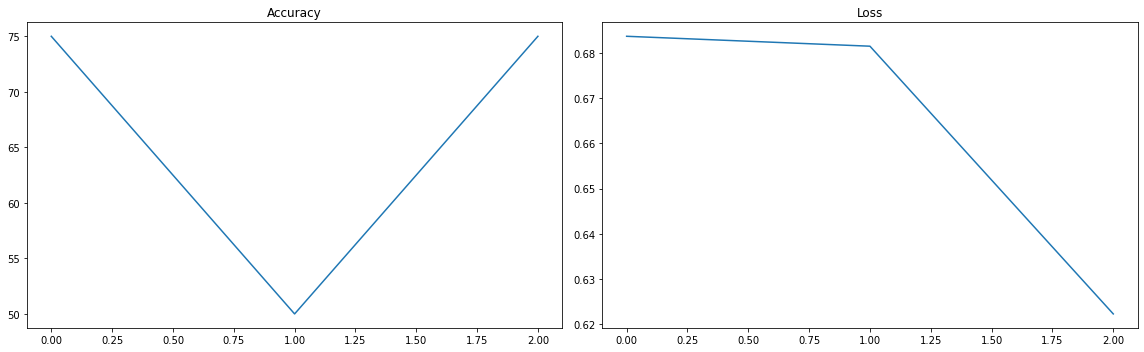

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
ax1.plot(acc_step_holder, label="Accuracy")
ax2.plot(loss_step_holder, label="Loss")
ax1.title.set_text("Accuracy")
ax2.title.set_text("Loss")
fig.tight_layout()
plt.show()

In [29]:
import os 

os.makedirs("models", exist_ok=True)
torch.save(model.state_dict(), "models/minilm_bal_exsum.pth")
!gsutil cp -r models $sum_dir

CommandException: Wrong number of arguments for "cp" command.


#Extractive Summarization Inference
In this notebook we will

Load a pretrained Pytorch model for extractive summarization
Perform inference and visualize sentence scores.
Build a simple pipleline for abstractive summarization using HuggingFace transformers

In [30]:
# get mean pooling for sentence bert models 
# ref https://www.sbert.net/examples/applications/computing-embeddings/README.html#sentence-embeddings-with-transformers
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask


# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 

class SentenceBertClass(torch.nn.Module):
    def __init__(self, model_name="sentence-transformers/paraphrase-MiniLM-L3-v2"):
        super(SentenceBertClass, self).__init__()
        self.l1 = AutoModel.from_pretrained(model_name)
        self.pre_classifier = torch.nn.Linear(384*3, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 1)
        self.classifierSigmoid = torch.nn.Sigmoid()

    def forward(self, sent_ids, doc_ids, sent_mask, doc_mask):

        sent_output = self.l1(input_ids=sent_ids, attention_mask=sent_mask) 
        sentence_embeddings = mean_pooling(sent_output, sent_mask) 

        doc_output = self.l1(input_ids=doc_ids, attention_mask=doc_mask) 
        doc_embeddings = mean_pooling(doc_output, doc_mask)

        # elementwise product of sentence embs and doc embs
        combined_features = sentence_embeddings * doc_embeddings  

        # get concat of both features and elementwise product
        feat_cat = torch.cat((sentence_embeddings, doc_embeddings, combined_features), dim=1)  
        
        pooler = self.pre_classifier(feat_cat) 
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        output = self.classifierSigmoid(output) 

        return output

In [31]:
#model path .. modify to location of trained model file 
model_path = "/content/models/minilm_bal_exsum.pth"

In [32]:
from torch import cuda
# device = 'cuda' if cuda.is_available() else 'cpu'
device = torch.device('cpu')

extractive_model = SentenceBertClass() 
extractive_model.load_state_dict(torch.load(model_path, map_location= device ))
extractive_model.eval();

#Extractive Summarization Inference

In [33]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-MiniLM-L3-v2')

# tokenize text as required by BERT based models
def get_tokens(text, tokenizer):
  inputs = tokenizer.batch_encode_plus(
            text, 
            add_special_tokens=True,
            max_length=512,
            padding="max_length",
            return_token_type_ids=True,
            truncation=True
        )
  ids = inputs['input_ids']
  mask = inputs['attention_mask']
  return ids, mask

In [34]:
# get predictions given some an array of sentences and their corresponding documents
def predict(model,sents, doc):
  sent_id, sent_mask = get_tokens(sents,tokenizer)
  sent_id, sent_mask = torch.tensor(sent_id, dtype=torch.long),torch.tensor(sent_mask, dtype=torch.long)
 
  doc_id, doc_mask = get_tokens([doc],tokenizer)
  doc_id, doc_mask = doc_id * len(sents), doc_mask* len(sents)
  doc_id, doc_mask = torch.tensor(doc_id, dtype=torch.long),torch.tensor(doc_mask, dtype=torch.long)

  preds = model(sent_id, doc_id, sent_mask, doc_mask)
  return preds

In [35]:
def summarize(doc, model, min_sentence_length=2, top_k=5, batch_size=3):
  doc = doc.replace("\n","")
  doc_sentences = []
  for sent in nlp(doc).sents:
    if len(sent) > min_sentence_length: 
      doc_sentences.append(str(sent))
  
  doc_id, doc_mask = get_tokens([doc],tokenizer)
  doc_id, doc_mask = doc_id * batch_size, doc_mask* batch_size
  doc_id, doc_mask = torch.tensor(doc_id, dtype=torch.long),torch.tensor(doc_mask, dtype=torch.long)

  scores = [] 
  # run predictions using some batch size
  for i in tqdm(range(int(len(doc_sentences) / batch_size) + 1)):
    batch_start = i*batch_size  
    batch_end = (i+1) * batch_size if (i+1) * batch_size < len(doc) else len(doc)-1
    batch = doc_sentences[batch_start: batch_end]
    if batch:
      preds = predict(model, batch, doc) 
      scores = scores + preds.tolist() 
 
  sent_pred_list = [{"sentence": doc_sentences[i], "score": scores[i][0], "index":i} for i in range(len(doc_sentences))]
  sorted_sentences = sorted(sent_pred_list, key=lambda k: k['score'], reverse=True) 

  sorted_result = sorted_sentences[:top_k] 
  sorted_result = sorted(sorted_result, key=lambda k: k['index']) 
  
  summary = [ x["sentence"] for x in sorted_result]
  summary = " ".join(summary)

  return summary, scores, doc_sentences

In [36]:
article = data['case_description'][1]

In [38]:
summary, scores, sentences = summarize(article, extractive_model, min_sentence_length=10, top_k=5, batch_size=4)
summary

  0%|          | 0/3 [00:00<?, ?it/s]

"Hi team,I hope you be do well!Thanks for reach out to Databricks. We be look into the detail and will circle back. Regards,PrasadHi Dmytro,Thank you for the update. From: dshcherbyna@tiltingpoint.com Thanks!We also have a bunch of GC failures in the previous successful runs. From: dshcherbyna@tiltingpoint.com GC failures be actually not failures accord to this article -https://technospace.medium.com/gc-allocation-failures-42c68e8e5e04So, we'll keep an eye on the stderr and log4j for now."

#Visualize Scores Assigned to Each Sentence
A visualization of the scores assigned by the model can help us "make sense" of model behaviour.

is the model weighting each sentence equally or focusing on some sentences? (ideally, we want to see good variation).

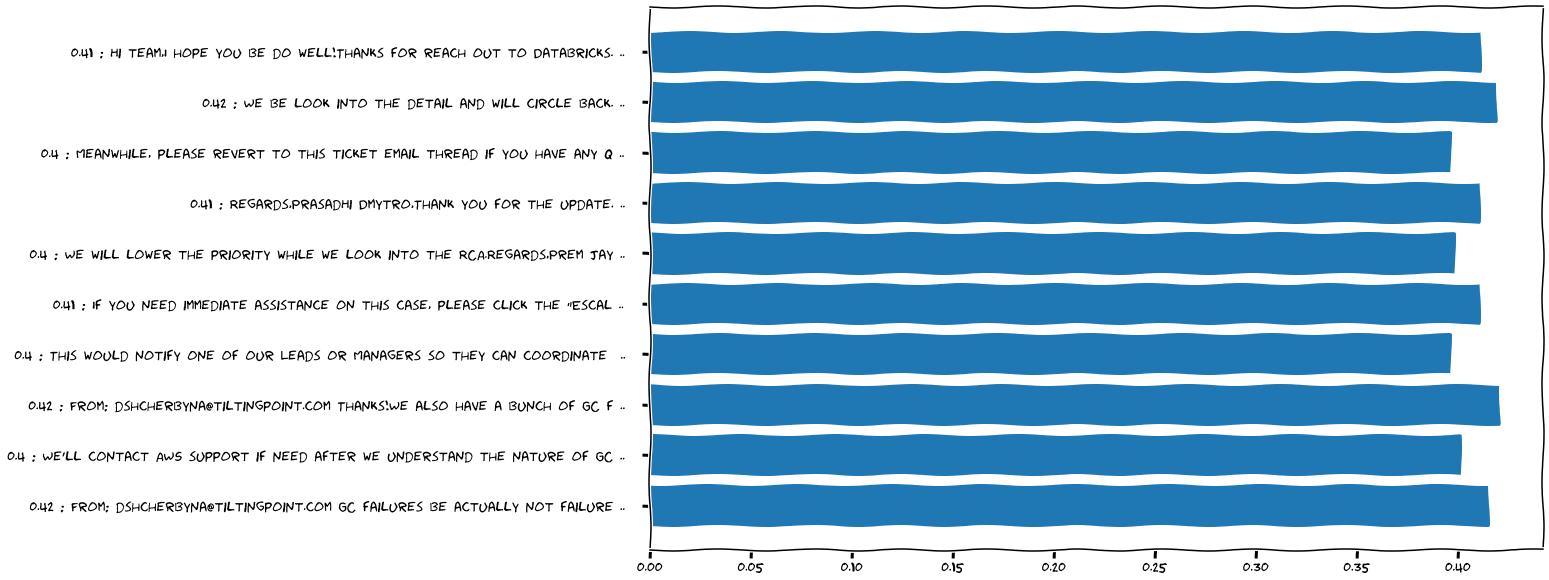

In [39]:
sent_lenth = 70
score_vals = ([x[0] for x in scores] ) 
sub_sents = [ str(round(score_vals[i],2)) + " : " + sentences[i][:sent_lenth] + " ..  " for i in range(len(sentences))] 
with plt.xkcd():
    plt.figure(figsize=(16,10));
    plt.barh(sub_sents[::-1], score_vals[::-1]);

#Abstractive Summarization with HF for Comparison

In [40]:
import urllib.request

import json

def save_json(data, file_path): 
  with open(file_path, 'w', encoding='utf-8') as f:
      json.dump(data, f, ensure_ascii=False, indent=4)

In [41]:
from transformers import pipeline
from tqdm.notebook import tqdm
ab_summarizer = pipeline("summarization", model="t5-base")
import re


Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [42]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

abs_model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
abs_tokenizer = AutoTokenizer.from_pretrained("t5-base")


In [43]:
def abstractive_summarize(doc,  max_length=250, min_length=10, batch_size=2):
  all_sum=[]
  # batched prediction
  for i in tqdm(range(int(len(doc) / batch_size) + 1)): 
    batch_start = i*batch_size  
    batch_end = (i+1) * batch_size if (i+1) * batch_size < len(doc) else len(doc)
    batch = ["summarize: " + x for x in doc[batch_start: batch_end]]   
    if (batch):
      inputs = abs_tokenizer.batch_encode_plus( batch, return_tensors="pt", max_length=512, truncation=True, padding=True) 
      outputs = abs_model.generate(inputs["input_ids"], max_length=max_length, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
      output = [re.sub(r'<([^>]*)>', "", abs_tokenizer.decode(x))  for x in outputs.tolist()]  
      all_sum = all_sum + output 
  return all_sum

In [44]:
article_contents = data['case_description'].to_list()

In [45]:
len(article_contents)

297

In [46]:
ab_summary = abstractive_summarize(article_contents)

  0%|          | 0/149 [00:00<?, ?it/s]

In [47]:
(ab_summary)

[' if you need immediate assistance on this case, please click the "Escalate" button. this would notify one of our Leads or Managers so they can coordinate this case with Engineers in that time zone.',
 ' if you need immediate assistance on this case, please click the "Escalate" button. this would notify one of our Leads or Managers so they can coordinate this case with Engineers in that time zone.',
 ' if you need immediate assistance on this case, please click the "Escalate" button in the help portal. if you need immediate assistance, please click the "Escalate" button in the help portal.',
 ' please check cx availability for the call and let us know. as there be no response I will close this case. please create new case once you receive update from cx.',
 ' if you are unable to add PenaRA@corning.com to the support portal contact list, please clarify. due to a technical bug, this case be land in the incorrect support queue. i create a new case with the same issue and move it to the 

In [48]:
ex_summary =  [summarize(x, extractive_model)[0] for x in article_contents ]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [49]:
ex_summary

['HiPaul,Greetings from Databricks!I be review the case further and will revert to you. DatabricksS3LoggingUtils$:V3: S3 request fail with com.amazonaws.services.s3.model. AmazonS3Exception: Forbidden; request: HEAD https://databricks-workspace-shared-tagging.s3.amazonaws.com {} Hadoop 3.3.1, aws-sdk-java/1.12.189 Linux/5.4.0-1083-aws OpenJDK_64-Bit_Server_VM/25.302-b08 java/1.8.0_302 scala/2.12.14 vendor/Azul_Systems,_Inc. cfg/retry-mode/legacy com.amazonaws.services.s3.model.HeadBucketRequest; Request ID: 5Q8PYR5CV68HXB4H, Extended Request ID: E1uI1uKS9kn+xTWn0OfulFypaTwQIl6aMBVnf5CZaxpS/Dz1xoBq/JF8muGi63nj0ju2EeIt4a8=, Cloud Provider: AWS, Instance ID: i-08e6e27203cd499b1 (Service: Amazon S3; Status Code: 403; Error Code: 403 Forbidden; Request ID: 5Q8PYR5CV68HXB4H; S3 Extended Request ID: E1uI1uKS9kn+xTWn0OfulFypaTwQIl6aMBVnf5CZaxpS/Dz1xoBq/JF8muGi63nj0ju2EeIt4a8=; Proxy: null), S3 Extended Request ID: E1uI1uKS9kn+xTWn0OfulFypaTwQIl6aMBVnf5CZaxpS/Dz1xoBq/JF8muGi63nj0ju2EeIt4a8=; Am

In [50]:
article_titles = [ x.replace("\t","").strip() for x in data['case_title']]

In [51]:
all_sum = [ {"title_x": article_titles[i], "content_description": article_contents[i], "abstractive_x": ab_summary[i], "extractive_x": ex_summary[i]} for i in range(len(article_contents))]
save_json(all_sum,"samples.json")


In [52]:
df = pd.DataFrame.from_dict(all_sum)
df


title_x  \
0    Databricks: S3 request fail with com.amazonaws...   
1         Databricks: GC failure in the latest upgrade   
2                     Databricks: ABFS Storage Problem   
3      Sruti, let us know CX availability for the call   
4               Databricks Support: PenaRA@corning.com   
..                                                 ...   
292                                Help@databricks.com   
293            Databricks Help: Delta Lake with Python   
294                 Asynchronous Error with Databricks   
295                       A Databricks Support Problem   
296             Databricks: Error: Job no longer exist   

                                   content_description  \
0    HiPaul,Greetings from Databricks!I be review t...   
1    Hi team,I hope you be do well!Thanks for reach...   
2    Hi team,I hope you be do well!Thanks for reach...   
3    Hello Sruti,Please let us know CX availability...   
4    Hi,Thank you for reach out to Databricks Suppo...   
..                                                 ...   
292  Hi John,Greetings from Databricks!Thanks for r...   
293  Hi Olli,Thanks for reach out to Databricks, I ...   
294  Hi Aya,I hope you be do well!Thanks for reach ...   
295  Hi Greg,Thanks for reach out to Databricks.We ...   
296  Hi team,I hope you be do well!Thanks for reach...   

                                         abstractive_x  \
0     if you need immediate assistance on this case...   
1     if you need immediate assistance on this case...   
2     if you need immediate assistance on this case...   
3     please check cx availability for the call and...   
4     if you are unable to add PenaRA@corning.com t...   
..                                                 ...   
292   John,please let me know the date and timezone...   
293   if you need immediate assistance, please clic...   
294   thank you so much for reach out to Databricks...   
295   if you need immediate assistance, please clic...   
296   it seems the Job be no longer exist can you p...   

                                          extractive_x  
0    HiPaul,Greetings from Databricks!I be review t...  
1    Hi team,I hope you be do well!Thanks for reach...  
2    Regards,PrasadHi Deeksha,Thanks for join the c...  
3    Hello Sruti,Please let us know CX availability...  
4    From: hamenooj@corning.com Why must we add Pen...  
..                                                 ...  
292  Do you have the query history URL where this e...  
293  Cluster URL on which you be running. Thanks,Ch...  
294  Regards,PrasadHostedContainer{hostPrivateIP=10...  
295  Request only the bytes you need via a range GE...  
296  Hi team,I hope you be do well!Thanks for reach...  

[297 rows x 4 columns]

In [53]:
df.shape

(297, 4)

In [54]:
df.to_csv("summarization_title_databricks.csv",index=False)

#TITLE *GENERATION*

In [6]:
import pandas as pd 
df = pd.read_csv("summarization_title_databricks.csv")
df.shape

(297, 4)

In [3]:
%%capture
!pip install transformers

In [4]:
from transformers import pipeline
#Feel free to play around with the generation parameters.
#Reduce the beam width for faster inference
#Note that the maximum length for the generated titles is 64
def Abstract(x):
     gen_kwargs = {"length_penalty": 0.6, "num_beams":4, "num_return_sequences": 4,"num_beam_groups":4,"max_length":512,"diversity_penalty":2.0,  "truncation":True}

     pipe = pipeline("summarization", model="RajSang/pegasus-sports-titles")

     result=pipe(x, **gen_kwargs)[0]["summary_text"]

     return result

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [7]:
df['new_title'] = df['extractive_x'].apply(lambda x: Abstract(x))

/usr/local/lib/python3.7/dist-packages/transformers/generation_beam_search.py:198: UserWarning: Passing `max_length` to BeamSearchScorer is deprecated and has no effect. `max_length` should be passed directly to `beam_search(...)`, `beam_sample(...)`, or `group_beam_search(...)`.
  "Passing `max_length` to BeamSearchScorer is deprecated and has no effect. "
Your max_length is set to 64, but you input_length is only 58. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 64, but you input_length is only 25. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 64, but you input_length is only 39. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)
Your max_length is set to 64, but you input_length is only 43. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=21)
Your max_length is set to 64, bu

In [8]:
df.new_title.to_list()

['Databricks: S3 request fail with com.amazonaws.services.s3.model',
 'GC failures be actually not failures accord to this article',
 'On the call with ABFS on storage issue',
 'How to contact CX via email',
 'PenaRA@corning.com not on the support portal contact list',
 'How to set spark metastore configuration properties',
 'What is the difference between good and bad run of spark UI?',
 'A problem with model load from DBFS and ABFSS',
 'How to skip first record in notebook?',
 'A look back at some of the most memorable moments from the 2016 Indian Premier League',
 'Can I give access to dashboard and no access to Hello editor?',
 'What is the problem with the event hub partition?',
 'DBC access grant for TSE',
 'Can you connect with the customer over the screen share session?',
 'Shumaila',
 'A request for permission to access workspace',
 'Can I connect to neo4j database from databricks workspace?',
 'Aazure-event-hubs-spark',
 'How to set up a Databricks account?',
 'Can you help m

In [9]:
df.to_csv('db_comments_new_title_summ.csv',index=False)

In [11]:
df

title_x  \
0    Databricks: S3 request fail with com.amazonaws...   
1         Databricks: GC failure in the latest upgrade   
2                     Databricks: ABFS Storage Problem   
3      Sruti, let us know CX availability for the call   
4               Databricks Support: PenaRA@corning.com   
..                                                 ...   
292                                Help@databricks.com   
293            Databricks Help: Delta Lake with Python   
294                 Asynchronous Error with Databricks   
295                       A Databricks Support Problem   
296             Databricks: Error: Job no longer exist   

                                   content_description  \
0    HiPaul,Greetings from Databricks!I be review t...   
1    Hi team,I hope you be do well!Thanks for reach...   
2    Hi team,I hope you be do well!Thanks for reach...   
3    Hello Sruti,Please let us know CX availability...   
4    Hi,Thank you for reach out to Databricks Suppo...   
..                                                 ...   
292  Hi John,Greetings from Databricks!Thanks for r...   
293  Hi Olli,Thanks for reach out to Databricks, I ...   
294  Hi Aya,I hope you be do well!Thanks for reach ...   
295  Hi Greg,Thanks for reach out to Databricks.We ...   
296  Hi team,I hope you be do well!Thanks for reach...   

                                         abstractive_x  \
0     if you need immediate assistance on this case...   
1     if you need immediate assistance on this case...   
2     if you need immediate assistance on this case...   
3     please check cx availability for the call and...   
4     if you are unable to add PenaRA@corning.com t...   
..                                                 ...   
292   John,please let me know the date and timezone...   
293   if you need immediate assistance, please clic...   
294   thank you so much for reach out to Databricks...   
295   if you need immediate assistance, please clic...   
296   it seems the Job be no longer exist can you p...   

                                          extractive_x  \
0    HiPaul,Greetings from Databricks!I be review t...   
1    Hi team,I hope you be do well!Thanks for reach...   
2    Regards,PrasadHi Deeksha,Thanks for join the c...   
3    Hello Sruti,Please let us know CX availability...   
4    From: hamenooj@corning.com Why must we add Pen...   
..                                                 ...   
292  Do you have the query history URL where this e...   
293  Cluster URL on which you be running. Thanks,Ch...   
294  Regards,PrasadHostedContainer{hostPrivateIP=10...   
295  Request only the bytes you need via a range GE...   
296  Hi team,I hope you be do well!Thanks for reach...   

                                             new_title  
0    Databricks: S3 request fail with com.amazonaws...  
1    GC failures be actually not failures accord to...  
2               On the call with ABFS on storage issue  
3                          How to contact CX via email  
4    PenaRA@corning.com not on the support portal c...  
..                                                 ...  
292                  Be30 deploy in region 23 days ago  
293              Cluster URL on which you are running.  
294                            How to host a container  
295                                      Pipeline Logs  
296                     Adb Error: Job No longer exist  

[297 rows x 5 columns]

In [1]:
%%capture
!pip install transformers

In [2]:
import pandas as pd 
df = pd.read_csv("db_comments_new_title_summ.csv")
df.head()

title_x  \
0  Databricks: S3 request fail with com.amazonaws...   
1       Databricks: GC failure in the latest upgrade   
2                   Databricks: ABFS Storage Problem   
3    Sruti, let us know CX availability for the call   
4             Databricks Support: PenaRA@corning.com   

                                 content_description  \
0  HiPaul,Greetings from Databricks!I be review t...   
1  Hi team,I hope you be do well!Thanks for reach...   
2  Hi team,I hope you be do well!Thanks for reach...   
3  Hello Sruti,Please let us know CX availability...   
4  Hi,Thank you for reach out to Databricks Suppo...   

                                       abstractive_x  \
0   if you need immediate assistance on this case...   
1   if you need immediate assistance on this case...   
2   if you need immediate assistance on this case...   
3   please check cx availability for the call and...   
4   if you are unable to add PenaRA@corning.com t...   

                                        extractive_x  \
0  HiPaul,Greetings from Databricks!I be review t...   
1  Hi team,I hope you be do well!Thanks for reach...   
2  Regards,PrasadHi Deeksha,Thanks for join the c...   
3  Hello Sruti,Please let us know CX availability...   
4  From: hamenooj@corning.com Why must we add Pen...   

                                           new_title  
0  Databricks: S3 request fail with com.amazonaws...  
1  GC failures be actually not failures accord to...  
2             On the call with ABFS on storage issue  
3                        How to contact CX via email  
4  PenaRA@corning.com not on the support portal c...

In [6]:
import torch
import tensorflow
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import logging
import nltk


try:
    tokenizer = AutoTokenizer.from_pretrained("content/title_token")
    model = AutoModelForSeq2SeqLM.from_pretrained("content/title_model")
    logging.warning("title model loaded")
except Exception as e:
    tokenizer = AutoTokenizer.from_pretrained("deep-learning-analytics/automatic-title-generation")
    tokenizer.save_pretrained('content/title_token')
    model = AutoModelForSeq2SeqLM.from_pretrained("deep-learning-analytics/automatic-title-generation")
    model.save_pretrained('content/title_model')
    logging.warning("title model downloaded and loaded")

#https://github.com/vijananish/title-summary-generation/blob/main/src/services/title_generation.py

In [7]:
def tokenize_data(text):
    # Tokenize the review body
    input_ = str(text) + ' </s>'
    max_len = 120
    # tokenize inputs
    tokenized_inputs = tokenizer(input_,  truncation=True, max_length=max_len,
                                  return_tensors='pt')

    inputs = {"input_ids": tokenized_inputs['input_ids'], "attention_mask": tokenized_inputs['attention_mask']}
    return inputs
def generate_answers(text):
    global model, tokenizer
    # torch.set_num_threads(20)
    # Below command is used to fix the random torch tensors created.
    torch.manual_seed(2809)
    inputs = tokenize_data(text)
    results = model.generate(input_ids=inputs['input_ids'],num_beams=8, attention_mask=inputs['attention_mask'], do_sample=True,
                             min_length=20, max_length=120,
                             no_repeat_ngram_size=1,
                             early_stopping=True
                             )
    decoded_output = tokenizer.batch_decode(results, skip_special_tokens=True)[0]
    predicted_title = nltk.sent_tokenize(decoded_output.strip())[0]
    return predicted_title

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
generate_answers(df['content_description'][0])

'Databricks Help Desk: If you need immediate assistance on this case, please click the "Send" button'

In [11]:
df['new_title_model'] = df['content_description'].apply(lambda x: generate_answers(x))

In [12]:
df.to_csv('new_title_summarize.csv',index=False)

In [13]:
df.head()

title_x  \
0  Databricks: S3 request fail with com.amazonaws...   
1       Databricks: GC failure in the latest upgrade   
2                   Databricks: ABFS Storage Problem   
3    Sruti, let us know CX availability for the call   
4             Databricks Support: PenaRA@corning.com   

                                 content_description  \
0  HiPaul,Greetings from Databricks!I be review t...   
1  Hi team,I hope you be do well!Thanks for reach...   
2  Hi team,I hope you be do well!Thanks for reach...   
3  Hello Sruti,Please let us know CX availability...   
4  Hi,Thank you for reach out to Databricks Suppo...   

                                       abstractive_x  \
0   if you need immediate assistance on this case...   
1   if you need immediate assistance on this case...   
2   if you need immediate assistance on this case...   
3   please check cx availability for the call and...   
4   if you are unable to add PenaRA@corning.com t...   

                                        extractive_x  \
0  HiPaul,Greetings from Databricks!I be review t...   
1  Hi team,I hope you be do well!Thanks for reach...   
2  Regards,PrasadHi Deeksha,Thanks for join the c...   
3  Hello Sruti,Please let us know CX availability...   
4  From: hamenooj@corning.com Why must we add Pen...   

                                           new_title  \
0  Databricks: S3 request fail with com.amazonaws...   
1  GC failures be actually not failures accord to...   
2             On the call with ABFS on storage issue   
3                        How to contact CX via email   
4  PenaRA@corning.com not on the support portal c...   

                                     new_title_model  
0  Databricks Help Desk: If you need immediate as...  
1  Reminder: We will lower priority while we look...  
2  Hi team,I hope you be doing well!Hi DeekshaJoi...  
3  CXAvailability for the Call: I work on IST Tim...  
4  Databricks Support: Can you please add PenaRA@...